# Example of notebook used to evaluate and get some metrics of the final models

## Original

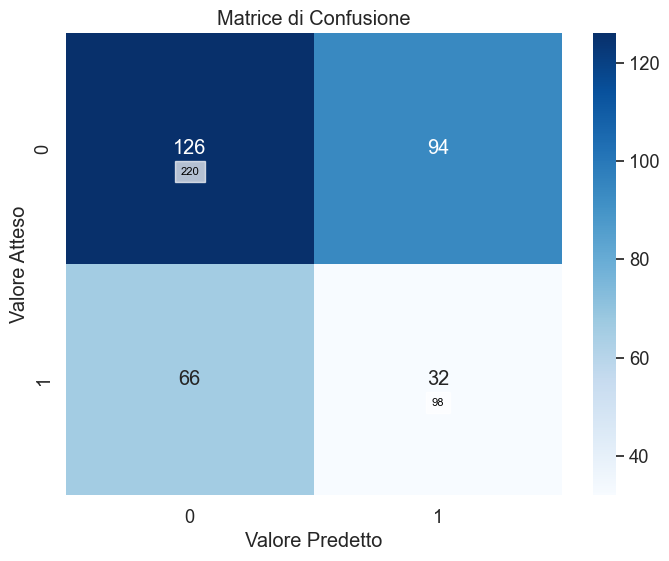

,precision,recall,f1-score,support
0,0.65625,0.572727,0.61165,220.0
1,0.253968,0.326531,0.285714,98.0
accuracy,,,0.496855,318.0
macro avg,0.455109,0.449629,0.448682,318.0
weighted avg,0.532276,0.496855,0.511205,318.0
micro avg,0.496855,0.496855,0.496855,318.0


In [2]:
import pandas as pd
df = pd.read_csv('GS1_original_Inference.csv')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Estrai le colonne "Expected" e "Output"
expected = df['Expected']
output = df['Output']

# Calcola la matrice di confusione
conf_matrix = confusion_matrix(expected, output)

# Calcola il totale per ogni classe
total_per_class = conf_matrix.sum(axis=1)

# Etichette delle classi
labels = ['0', '1']

# Crea il plot della matrice di confusione
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Imposta la scala del font

# Plot della matrice di confusione con annotazioni
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Aggiungi i totali per classe sulla diagonale
for i in range(len(labels)):
    plt.text(i + 0.5, i + 0.6, total_per_class[i], fontsize=8, color='black', bbox=dict(facecolor='white', alpha=0.7), ha='center', va='center')

plt.title('Matrice di Confusione')
plt.xlabel('Valore Predetto')
plt.ylabel('Valore Atteso')
plt.show()



from sklearn import metrics
def get_classification_report(y_test, y_pred):    
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    
    precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_test, y_pred, average=None)
    
    micro_precision, micro_recall, _, _ = metrics.precision_recall_fscore_support(y_test, y_pred, average='micro')
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)
    
    macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')
    
    report.update({
        "accuracy": {"precision": "", "recall": "", "f1-score": report["accuracy"], "support": report['macro avg']['support']},
        "micro avg": {"precision": micro_precision, "recall": micro_recall, "f1-score": micro_f1, "support": len(y_test)},
        "macro avg": {"precision": precision.mean(), "recall": recall.mean(), "f1-score": macro_f1, "support": len(y_test)}
    })
    
    df_classification_report = pd.DataFrame(report).transpose()
    
    return df_classification_report

res = get_classification_report(df['Expected'], df['Output'])
res.to_csv("../../results_table/original/gemma_2B_original.csv")
res